<a href="https://colab.research.google.com/github/isharhan/hello-world/blob/main/3Mars_missions_Vader_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vader-multi

     |████████████████████████████████| 133kB 5.6MB/s 


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
analyser.polarity_scores("I’m so happy we finally have another rover on Mars")

{'compound': 0.6115, 'neg': 0.0, 'neu': 0.693, 'pos': 0.307}

In [ ]:
analyser.polarity_scores("Why wasting money on Mars mission when you don’t have money for water and electricity")

{'compound': -0.4019, 'neg': 0.162, 'neu': 0.838, 'pos': 0.0}

In [ ]:
#In Chinese
analyser.polarity_scores("我很高兴我们终于有了另一辆流浪者")

{'compound': 0.4588, 'neg': 0.0, 'neu': 0.7, 'pos': 0.3}

In [ ]:
#In Indian
analyser.polarity_scores("जब आप पानी और बिजली के लिए पैसा नहीं देते तो मंगल मिशन पर पैसा क्यों बर्बाद करना")

{'compound': -0.362, 'neg': 0.164, 'neu': 0.76, 'pos': 0.076}

In [ ]:
#In Arabic
analyser.polarity_scores("ناسا الأمريكية تهنئ الإمارات بمناسبة وصول مسبار الأمل إلى المريخ")

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.805, 'pos': 0.195}

In [3]:
pip install tweepy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re


In [5]:
consumer_key = "aKAvYeraEMQNHbzVG22rz3uMH"
consumer_secret = "G5I0UZmi9TTadbQPppIwbYTPTIqAj6tkjswbOHmEddYZAaXpxt"
access_key = "1850387936-ZPLc7EWyknMNUivIokQV3KO8ZTRiXrRcPEuOfOr"
access_secret = "PlIKokmRHHs8SPkmrZrthsDV6ZvCFdiE2DthySmA2luO7"
    
def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [6]:
comp_searches = ("@HopeMarsMission", "@NASAPersevere", "@CNSA_en")

In [7]:
# Array to hold sentiment
sentiments = []
for search in comp_searches:
  comp_tweets = api.user_timeline(search, count=100)
  for tweet in comp_tweets:
    text = tweet["text"]
    sentiments.append({"User": search,
                           "text":text,
                       "Date": tweet["created_at"] 
                        })
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(10)
    
    
        
        

        

,User,text,Date
0,@HopeMarsMission,RT @HHShkMohd: Another successful mission has ...,Thu Feb 18 20:57:41 +0000 2021
1,@HopeMarsMission,RT @HHShkMohd: انضمت اليوم بعثة جديدة من كوكب ...,Thu Feb 18 20:57:39 +0000 2021
2,@HopeMarsMission,Inspired by @NASA's work since we were childre...,Thu Feb 18 20:57:11 +0000 2021
3,@HopeMarsMission,RT @HHShkMohd: نهنىء جمهورية الصين الشعبية بإن...,Wed Feb 17 05:19:55 +0000 2021
4,@HopeMarsMission,RT @MohamedBinZayed: The transmission of the H...,Sun Feb 14 09:37:55 +0000 2021
5,@HopeMarsMission,RT @MohamedBinZayed: إرسال أول صورة للمريخ بعد...,Sun Feb 14 09:37:53 +0000 2021
6,@HopeMarsMission,RT @HHShkMohd: من ارتفاع ٢٥ ألف كم عن سطح الكو...,Sun Feb 14 09:37:45 +0000 2021
7,@HopeMarsMission,RT @DXBMediaOffice: عمران شرف، مدير مشروع #الإ...,Fri Feb 12 07:08:09 +0000 2021
8,@HopeMarsMission,"RT @DXBMediaOffice: Omran Sharaf, Project Dire...",Fri Feb 12 07:07:58 +0000 2021
9,@HopeMarsMission,"RT @DXBMediaOffice: .@SarahAmiri1, Minister of...",Fri Feb 12 07:07:53 +0000 2021


In [8]:
#to see tweets for specific User name 
df_nasa = df[ df['User'] == '@NASAPersevere']
df_nasa.head()

,User,text,Date
100,@NASAPersevere,RT @NASA: ‼️ HAPPENING NOW: @NASAPersevere exp...,Mon Feb 22 21:30:01 +0000 2021
101,@NASAPersevere,Scan this image for the various pieces of my l...,Mon Feb 22 20:52:23 +0000 2021
102,@NASAPersevere,More sounds of Mars: https://t.co/wRrDvkUxeC,Mon Feb 22 19:43:29 +0000 2021
103,@NASAPersevere,"Now that you’ve seen Mars, hear it. Grab some ...",Mon Feb 22 19:43:28 +0000 2021
104,@NASAPersevere,"Landing on Mars is a rush of tension, drama, a...",Mon Feb 22 19:30:21 +0000 2021


In [9]:
#to see tweets for specific User name 
df_china = df[ df['User'] == '@CNSA_en']
df_china.head()

,User,text,Date
200,@CNSA_en,RT @ChinaEUMission: #China and @UNOOSA signed ...,Wed Jun 20 16:07:30 +0000 2018
201,@CNSA_en,RT @UNOOSA: Press release: United Nations and ...,Wed Jun 20 16:05:29 +0000 2018
202,@CNSA_en,RT @UNOOSA: 50 day #countdown to #UNISPACE50:\...,Wed Jun 20 16:05:12 +0000 2018
203,@CNSA_en,RT @UNOOSA: Great to see so many leaders of sp...,Wed Jun 20 13:46:47 +0000 2018


In [10]:
#to see tweets for specific User name 
df_uae = df[ df['User'] == '@HopeMarsMission']
df_uae.head()

,User,text,Date
0,@HopeMarsMission,RT @HHShkMohd: Another successful mission has ...,Thu Feb 18 20:57:41 +0000 2021
1,@HopeMarsMission,RT @HHShkMohd: انضمت اليوم بعثة جديدة من كوكب ...,Thu Feb 18 20:57:39 +0000 2021
2,@HopeMarsMission,Inspired by @NASA's work since we were childre...,Thu Feb 18 20:57:11 +0000 2021
3,@HopeMarsMission,RT @HHShkMohd: نهنىء جمهورية الصين الشعبية بإن...,Wed Feb 17 05:19:55 +0000 2021
4,@HopeMarsMission,RT @MohamedBinZayed: The transmission of the H...,Sun Feb 14 09:37:55 +0000 2021


In [11]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [12]:
df['text'] = clean_tweets(df['text'])
df['text'].head()

0     Another successful mission has just reached M...
1     انضمت اليوم بعثة جديدة من كوكب الأرض للكوكب ا...
2    Inspired by 's work since we were children, we...
3     نهنىء جمهورية الصين الشعبية بإنجازها العظيم و...
4     The transmission of the Hope Probe's first im...
Name: text, dtype: object

In [13]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    pos = analyser.polarity_scores(df['text'][i])["pos"]
    compound = analyser.polarity_scores(df['text'][i])["compound"]
    neu = analyser.polarity_scores(df['text'][i])["neu"]
    neg = analyser.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [14]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,User,text,Date,Compound,Positive,Negative,Neutral
0,@HopeMarsMission,Another successful mission has just reached M...,Thu Feb 18 20:57:41 +0000 2021,0.9403,0.547,0.0,0.453
1,@HopeMarsMission,انضمت اليوم بعثة جديدة من كوكب الأرض للكوكب ا...,Thu Feb 18 20:57:39 +0000 2021,0.8689,0.266,0.0,0.734
2,@HopeMarsMission,"Inspired by 's work since we were children, we...",Thu Feb 18 20:57:11 +0000 2021,0.7351,0.256,0.0,0.744
3,@HopeMarsMission,نهنىء جمهورية الصين الشعبية بإنجازها العظيم و...,Wed Feb 17 05:19:55 +0000 2021,0.9403,0.344,0.0,0.656
4,@HopeMarsMission,The transmission of the Hope Probe's first im...,Sun Feb 14 09:37:55 +0000 2021,0.4404,0.121,0.0,0.879


In [15]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['العرب_إلى_المريخ',
 'مسبار_الأمل',
 'ArabsToMars',
 'HopeProbe',
 'العرب_إلى_المريخ',
 'مسبار_الأمل',
 'ArabsToMars',
 'HopeProbe',
 'العرب_إلى_المريخ',
 'مسبار_الأمل',
 'العرب_إلى_المريخ',
 'HopeProbe',
 'ArabsToMars',
 'مسبار_الأمل',
 'العرب_إلى_المريخ',
 'العرب_إلى_المريخ',
 'مسبار_الأمل',
 'ArabsToMars',
 'HopeProbe',
 'ArabsToMars',
 'HopeProbe',
 'العرب_إلى_المريخ',
 'مسبار_الأمل',
 'مسبار_الأمل',
 'مسبار_الأمل',
 'المريخ',
 'العرب_إلى_المريخ',
 'CountdownToMars',
 'UNISPACE50']

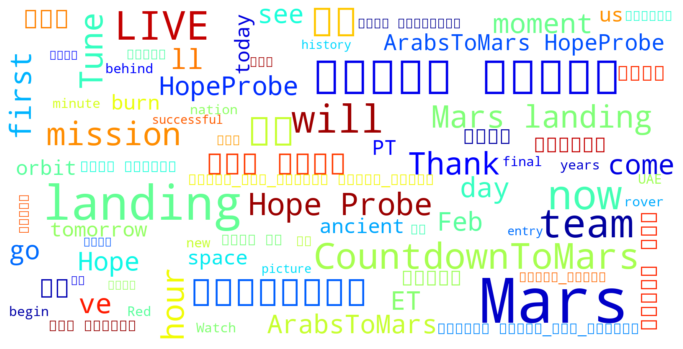

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=int(1600),
        height=int(800),
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=150).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['text'])

In [17]:
#Collect the Positive values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table

,Positive
User,
@CNSA_en,0.15125
@HopeMarsMission,0.16547
@NASAPersevere,0.09635


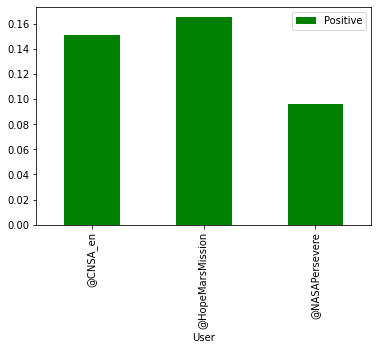

In [27]:
#plotting 
pos_score_table.plot(kind='bar',color= 'green')

In [19]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@CNSA_en,0.00000
@HopeMarsMission,0.00376
@NASAPersevere,0.01211


In [18]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@CNSA_en,0.406475
@HopeMarsMission,0.456652
@NASAPersevere,0.186416


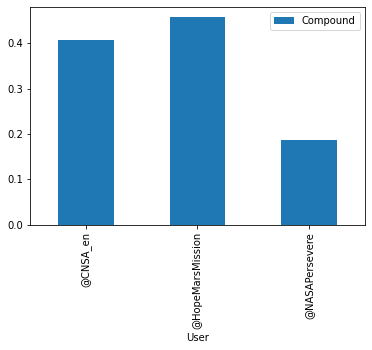

In [29]:
#plotting 
score_table.plot(kind='bar')

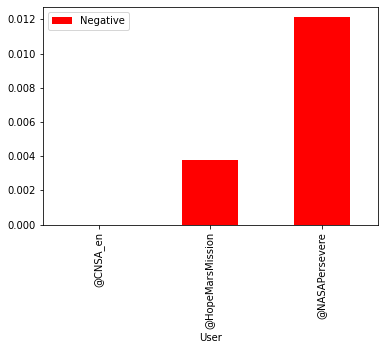

In [24]:
neg_score_table.plot(kind='bar',color='red')